In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from depthestimation import DepthEstimator
import matplotlib.pyplot as plt

In [2]:
estimator = DepthEstimator()
estimator.load_preset('./data/stereo_preset.json')
estimator.train_depth_mapping('./data/depth_map_notebook.npy')

./data/depth_map_notebook.npy


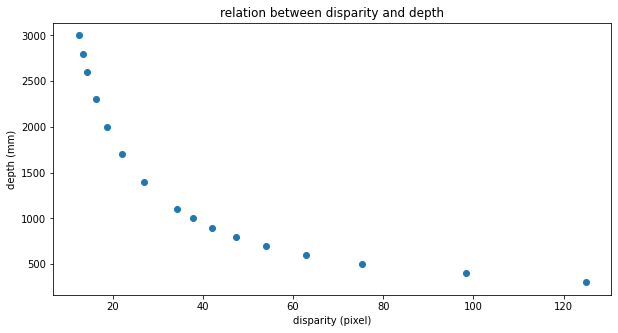

In [4]:
mapping = np.load('./data/depth_map_notebook.npy')
disp = [np.float32(value[0]) for value in mapping]
depth = [np.float32(value[1]) for value in mapping]

plt.figure(figsize=(10,5))

plt.ylabel('depth (mm)')
plt.xlabel('disparity (pixel)')
plt.title('relation between disparity and depth')
plt.scatter(disp, depth)

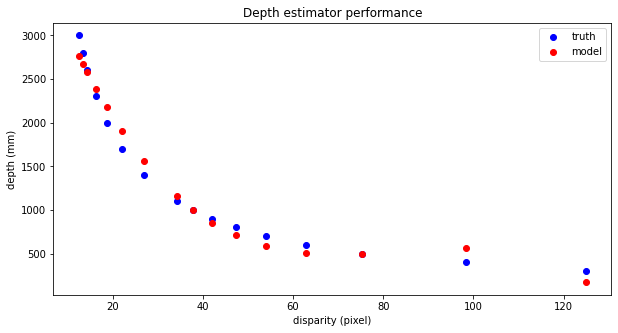

In [5]:
x = np.arange(0, 120, 3)
y = [estimator.predict_depth(xi) for xi in disp]

plt.figure(figsize=(10,5))
plt.title('Depth estimator performance')
plt.ylabel('depth (mm)')
plt.xlabel('disparity (pixel)')
plt.scatter(disp, depth, color='blue', label='truth')
plt.scatter(disp, y, color='red', label='model')
plt.legend()
plt.show()